https://zenn.dev/dev_commune/articles/b93a7296fbb354

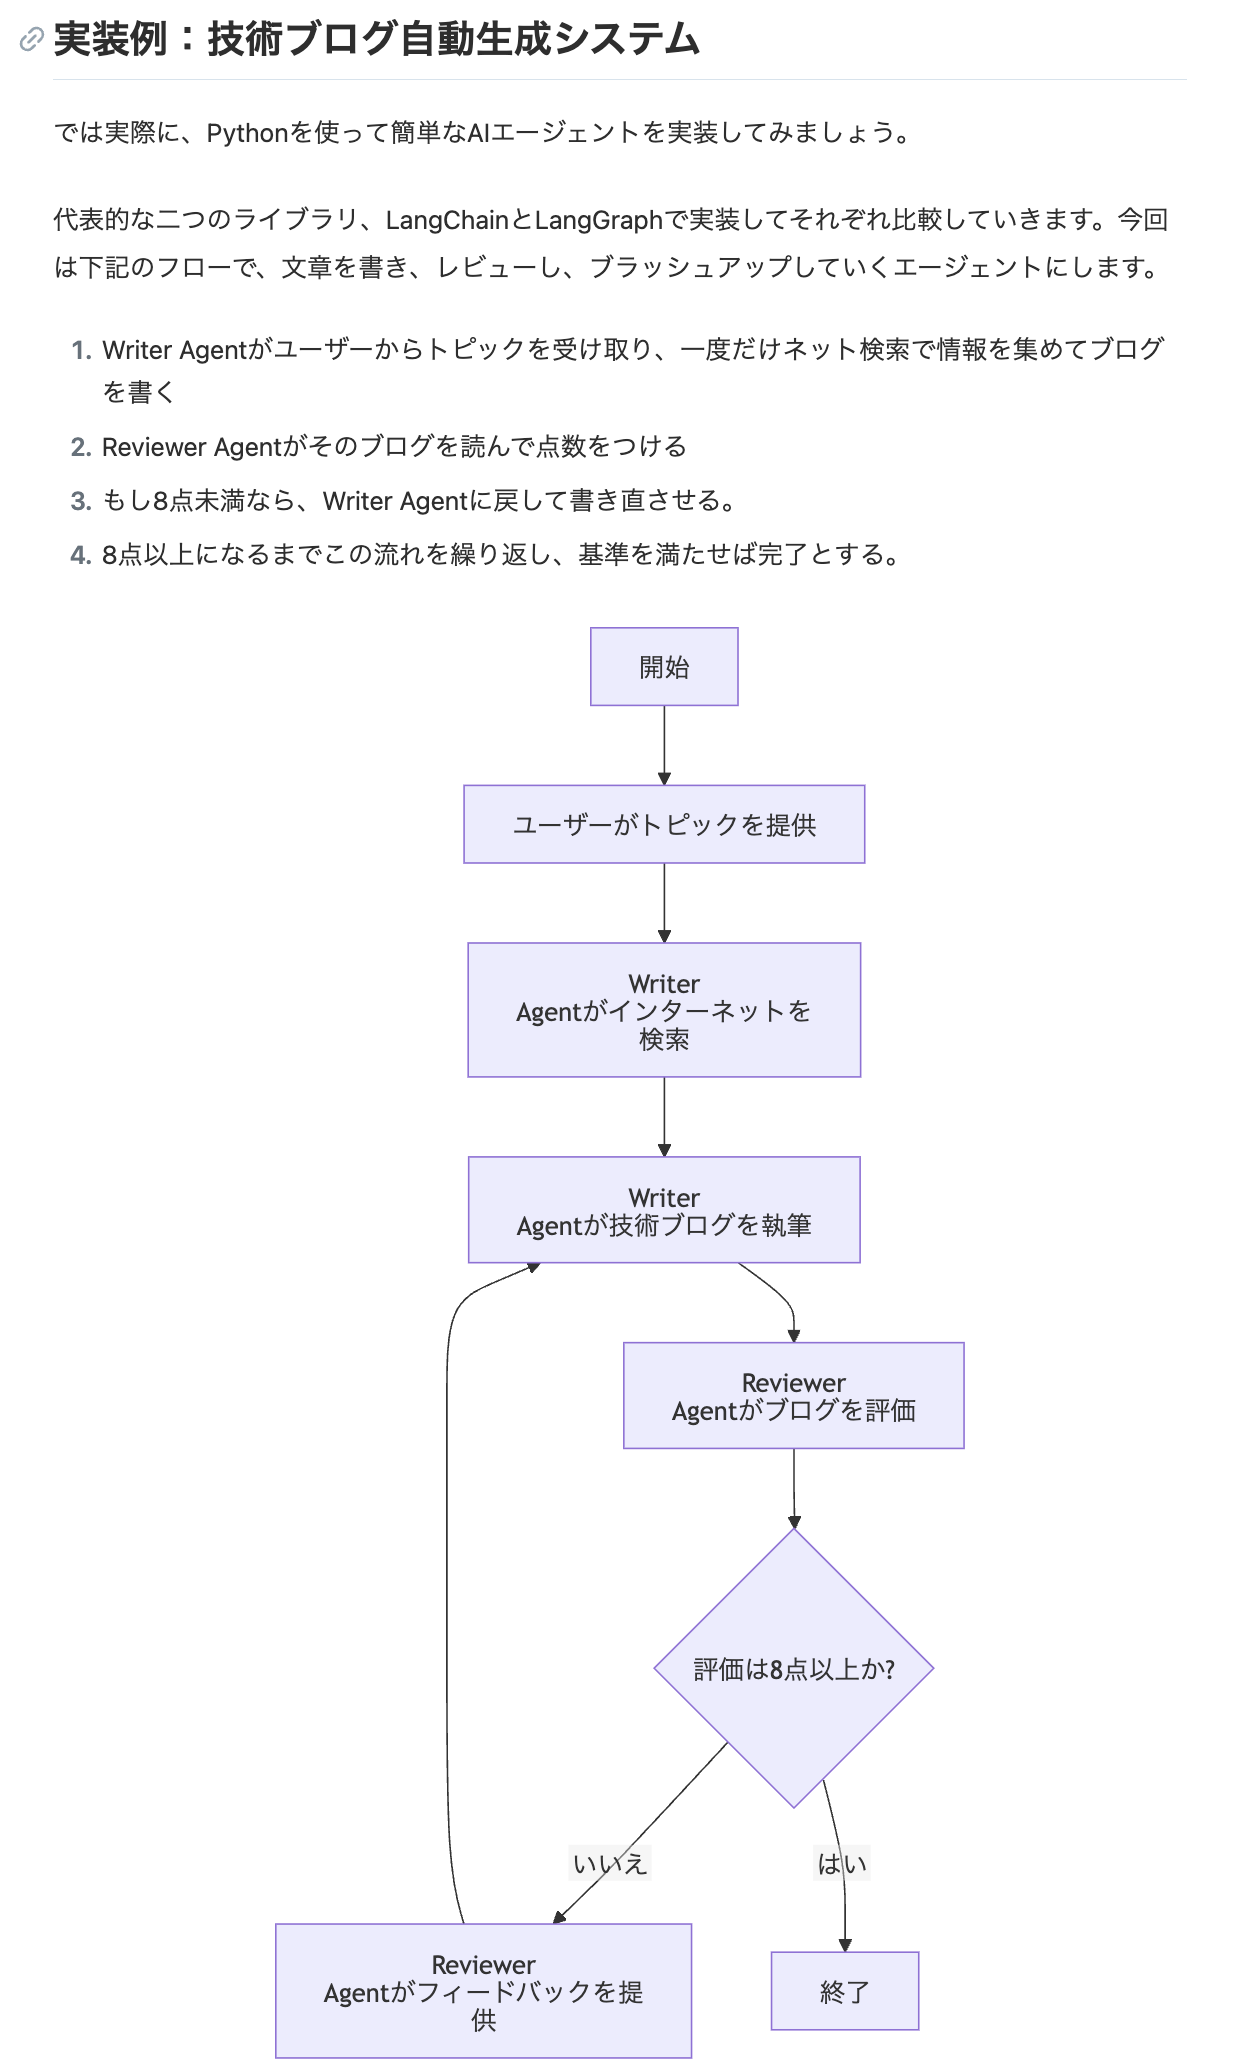

In [1]:
from dotenv import load_dotenv
import os
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
load_dotenv()

TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [61]:
from langchain_openai import ChatOpenAI
from omegaconf import OmegaConf
from langchain_core.output_parsers import StrOutputParser
from typing import Any
from langchain_core.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate


In [65]:
writer_config = OmegaConf.load('writer.yaml')
reviewer_config = OmegaConf.load('reviewer.yaml')
writer_config = OmegaConf.to_container(writer_config, resolve=True)
reviewer_config = OmegaConf.to_container(reviewer_config, resolve=True)


In [ ]:
writer_config

In [67]:
writer_messages = writer_config['messages']

writer_prompt_messages = []

for message in writer_messages:
    role, content = message
    if role == 'system':
        writer_prompt_messages.append(SystemMessagePromptTemplate.from_template(content))
    elif role == 'human':
        writer_prompt_messages.append(HumanMessagePromptTemplate.from_template(content))

In [68]:
reviewer_messages = reviewer_config['messages']

reviewer_prompt_messages = []

for message in reviewer_messages:
    role, content = message
    if role == 'system':
        reviewer_prompt_messages.append(SystemMessagePromptTemplate.from_template(content))
    elif role == 'human':
        reviewer_prompt_messages.append(HumanMessagePromptTemplate.from_template(content))

In [14]:
llm = ChatOpenAI(temperature=0.7, model="gpt-4o-mini")
search = TavilySearchResults(max_results=2)

# === Define the chain ===

def get_search_results(inputs: dict[str, Any]) -> Any:
    if "search_results" in inputs:
        return inputs["search_results"]
    return search.run(inputs["input"])





In [74]:
writer_prompt  = ChatPromptTemplate(writer_prompt_messages)
reviewer_prompt  = ChatPromptTemplate(reviewer_prompt_messages)

In [75]:
writer_chain = (
    {
        "input": lambda x: x["input"],
        "search_results": get_search_results,
        "review": lambda x: x.get("review", "初回の記事作成のため、レビューはありません。"),
    }
    | writer_prompt
    | llm
    | StrOutputParser()
)

In [77]:
reviewer_chain = reviewer_prompt | llm | StrOutputParser()

In [44]:
# def run_blog_creation_process(topic: str) -> tuple[str, str]:
#     search_results = search.run(topic)
#     blog_content = writer_chain.invoke({"input": topic, "search_results": search_results})
#     review = reviewer_chain.invoke({"blog_content": blog_content})

#     score = parse_score(review)

#     while score <= 8:
#         blog_content = writer_chain.invoke(
#             {"input": topic, "search_results": search_results, "review": review}
#         )
#         review = reviewer_chain.invoke({"blog_content": blog_content})
#         score = parse_score(review)

#     print(f"最終スコア: {score}")
#     return blog_content, review

topic = "LangGraphのMulti Agent Systemを使った技術ブログを書いてください。"
# final_blog, final_review = run_blog_creation_process(topic)

In [78]:
search_results = search.run(topic)
blog_content = writer_chain.invoke({"input": topic, "search_results": search_results})
review = reviewer_chain.invoke({"blog_content": blog_content})

In [ ]:
search_results

In [ ]:
review

In [ ]:
blog_content

'評価結果は以下の通りです：\n\n1. 技術的正確性: 1.5/2 - LangGraphとマルチエージェントシステムに関する情報は概ね正確ですが、特定の技術的詳細や最新の研究成果が不足しています。特に、LangGraphのバージョンや特性についての具体的な情報があれば、より信頼性が高まるでしょう。\n\n2. 具体的なコード例: 1.5/2 - コード例は提供されていますが、もう少し実際のユースケースに基づいた複雑な例や、エラーハンドリングや拡張性を考慮した実装があれば、より実用的です。\n\n3. 記事の長さ: 1/2 - 記事の長さは5000字には達していません。より詳細な説明や追加のユースケースを加えることで、情報の深みを増すことができます。\n\n4. 構成と読みやすさ: 1.5/2 - 構成は概ね論理的ですが、一部のセクションがやや短く、詳細な説明が不足しています。また、項目ごとの見出しや箇条書きを効果的に使うことで、さらに読みやすくすることができます。\n\n5. 独自性と洞察: 1/2 - 記事は基本的な情報を提供していますが、独自の視点や深い洞察が不足しています。競合技術との比較をさらに深めたり、LangGraphのユニークな特徴にもっと焦点を当てたりすることで、独自性を高めることができます。\n\n総合評価: 6.5/10\n\n改善提案：\n1. 記事を5000字以上にするために、各セクションを拡充し、特に実装例やユースケースを増やしてください。\n2. より具体的な技術的詳細や、LangGraphのバージョンや特性に関する最新の情報を加え、読者が信頼できる情報を得られるようにしてください。\n3. コード例を複雑なユースケースに基づくものにし、エラーハンドリングや拡張性を考慮した実装を示すことで、実用性を高めてください。\n4. 独自の視点や洞察を加えるために、他のマルチエージェントシステムとの具体的な比較を行い、LangGraphの特性をより際立たせるよう努めてください。'

In [ ]:
'評価結果は以下の通りです：\n\n1. 技術的正確性: 1.5/2 - LangGraphとマルチエージェントシステムに関する情報は概ね正確ですが、特定の技術的詳細や最新の研究成果が不足しています。特に、LangGraphのバージョンや特性についての具体的な情報があれば、より信頼性が高まるでしょう。\n\n2. 具体的なコード例: 1.5/2 - コード例は提供されていますが、もう少し実際のユースケースに基づいた複雑な例や、エラーハンドリングや拡張性を考慮した実装があれば、より実用的です。\n\n3. 記事の長さ: 1/2 - 記事の長さは5000字には達していません。より詳細な説明や追加のユースケースを加えることで、情報の深みを増すことができます。\n\n4. 構成と読みやすさ: 1.5/2 - 構成は概ね論理的ですが、一部のセクションがやや短く、詳細な説明が不足しています。また、項目ごとの見出しや箇条書きを効果的に使うことで、さらに読みやすくすることができます。\n\n5. 独自性と洞察: 1/2 - 記事は基本的な情報を提供していますが、独自の視点や深い洞察が不足しています。競合技術との比較をさらに深めたり、LangGraphのユニークな特徴にもっと焦点を当てたりすることで、独自性を高めることができます。\n\n総合評価: 6.5/10\n\n改善提案：\n1. 記事を5000字以上にするために、各セクションを拡充し、特に実装例やユースケースを増やしてください。\n2. より具体的な技術的詳細や、LangGraphのバージョンや特性に関する最新の情報を加え、読者が信頼できる情報を得られるようにしてください。\n3. コード例を複雑なユースケースに基づくものにし、エラーハンドリングや拡張性を考慮した実装を示すことで、実用性を高めてください。\n4. 独自の視点や洞察を加えるために、他のマルチエージェントシステムとの具体的な比較を行い、LangGraphの特性をより際立たせるよう努めてください。'